In [2]:
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv("./attack-simulation-alert.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the column names--> since there are no column names, it will display the first row. 
print("\nColumn names:")
print(df.columns)


C:\Users\naysa\AppData\Local\Temp\ipykernel_12164\2344123198.py:4: DtypeWarning: Columns (34,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,54,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./attack-simulation-alert.csv")


First few rows of the dataset:
   frame.number  frame.len                           frame.time  \
0             1         66  Jun  4, 2023 11:23:38.841103000 EDT   
1             2         42  Jun  4, 2023 11:23:38.842266000 EDT   
2             3         42  Jun  4, 2023 11:23:38.842439000 EDT   
3             4         66  Jun  4, 2023 11:23:38.842583000 EDT   
4             5         54  Jun  4, 2023 11:23:38.842873000 EDT   

   frame.time_epoch       frame.protocols            eth.src  \
0      1.685892e+09  eth:ethertype:ip:tcp  00:50:56:c0:00:0a   
1      1.685892e+09     eth:ethertype:arp  00:0c:29:8f:ca:0a   
2      1.685892e+09     eth:ethertype:arp  00:50:56:c0:00:0a   
3      1.685892e+09  eth:ethertype:ip:tcp  00:0c:29:8f:ca:0a   
4      1.685892e+09  eth:ethertype:ip:tcp  00:50:56:c0:00:0a   

             eth.dst eth.type        ip.src        ip.dst  ...  \
0  00:0c:29:8f:ca:0a   0x0800    10.20.30.1  10.20.30.101  ...   
1  ff:ff:ff:ff:ff:ff   0x0806           NaN      

In [2]:
#count rows of missing data for each column
missing_number=df.isnull().sum().sort_values(ascending=False)
#Calculate percentage of null value
missing_percentage=missing_number/len(df)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(40)

,missing number,missing percentage
imap.request.command,6262654,1.000000
ftp.request.arg,6262654,1.000000
ftp.request.command,6262654,1.000000
smtp.req.command,6262654,1.000000
smtp.data.fragment,6262654,1.000000
pop.request.command,6262654,1.000000
pop.response,6262654,1.000000
imap.response,6262654,1.000000
ftp.response.code,6262654,1.000000
ftp.response.arg,6262654,1.000000


In [3]:
import pandas as pd

def remove_null_columns(df, threshold=0.7):
    """
    Remove columns from a DataFrame where more than a specified percentage of values are null.

    Parameters:
    df (DataFrame): Input DataFrame.
    threshold (float): Percentage threshold for null values (default is 0.85).

    Returns:
    DataFrame: DataFrame with columns containing more than the threshold percentage of null values removed.
    """
    # Calculate the number of null values in each column
    null_counts = df.isnull().sum()

    # Calculate the percentage of null values in each column
    total_rows = len(df)
    null_percentages = null_counts / total_rows

    # Identify columns where the null percentage exceeds the threshold
    columns_to_drop = null_percentages[null_percentages > threshold].index

    # Remove identified columns from the DataFrame
    df_cleaned = df.drop(columns=columns_to_drop)

    return df_cleaned

# Example usage:
# Assuming df is your DataFrame
df = remove_null_columns(df, threshold=0.7)
print("\nColumn names:")
print(df.columns)


Column names:
Index(['frame.number', 'frame.len', 'frame.time', 'frame.time_epoch',
       'frame.protocols', 'eth.src', 'eth.dst', 'eth.type', 'ip.src', 'ip.dst',
       'ip.len', 'ip.ttl', 'ip.flags', 'ip.frag_offset', 'ip.proto',
       'ip.version', 'ip.dsfield', 'ip.checksum', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.seq', 'tcp.ack', 'tcp.flags', 'tcp.flags.syn',
       'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.reset', 'tcp.window_size',
       'tcp.checksum', 'tcp.stream', 'http.request.method', 'http.request.uri',
       'http.request.version', 'http.request.full_uri', 'http.response.code',
       'http.user_agent', 'http.content_length_header', 'http.content_type',
       'http.host', 'http.connection', 'alert'],
      dtype='object')


In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   frame.number  frame.len                           frame.time  \
0             1         66  Jun  4, 2023 11:23:38.841103000 EDT   
1             2         42  Jun  4, 2023 11:23:38.842266000 EDT   
2             3         42  Jun  4, 2023 11:23:38.842439000 EDT   
3             4         66  Jun  4, 2023 11:23:38.842583000 EDT   
4             5         54  Jun  4, 2023 11:23:38.842873000 EDT   

   frame.time_epoch       frame.protocols            eth.src  \
0      1.685892e+09  eth:ethertype:ip:tcp  00:50:56:c0:00:0a   
1      1.685892e+09     eth:ethertype:arp  00:0c:29:8f:ca:0a   
2      1.685892e+09     eth:ethertype:arp  00:50:56:c0:00:0a   
3      1.685892e+09  eth:ethertype:ip:tcp  00:0c:29:8f:ca:0a   
4      1.685892e+09  eth:ethertype:ip:tcp  00:50:56:c0:00:0a   

             eth.dst eth.type        ip.src        ip.dst  ...  \
0  00:0c:29:8f:ca:0a   0x0800    10.20.30.1  10.20.30.101  ...   
1  ff:ff:ff:ff:ff:ff   0x0806           NaN      

In [4]:
columns_to_remove = ['frame.number', 'frame.time', 'tcp.checksum','frame.time_epoch']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

In [17]:
columns_to_remove = ['frame.time_epoch']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

In [18]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   frame.len       frame.protocols            eth.src            eth.dst  \
0         66  eth:ethertype:ip:tcp  00:50:56:c0:00:0a  00:0c:29:8f:ca:0a   
1         42     eth:ethertype:arp  00:0c:29:8f:ca:0a  ff:ff:ff:ff:ff:ff   
2         42     eth:ethertype:arp  00:50:56:c0:00:0a  00:0c:29:8f:ca:0a   
3         66  eth:ethertype:ip:tcp  00:0c:29:8f:ca:0a  00:50:56:c0:00:0a   
4         54  eth:ethertype:ip:tcp  00:50:56:c0:00:0a  00:0c:29:8f:ca:0a   

  eth.type        ip.src        ip.dst  ip.len  ip.ttl ip.flags  ...  \
0   0x0800    10.20.30.1  10.20.30.101    52.0   128.0     0x02  ...   
1   0x0806           NaN           NaN     NaN     NaN      NaN  ...   
2   0x0806           NaN           NaN     NaN     NaN      NaN  ...   
3   0x0800  10.20.30.101    10.20.30.1    52.0    64.0     0x02  ...   
4   0x0800    10.20.30.1  10.20.30.101    40.0   128.0     0x02  ...   

   http.request.version  http.request.full_uri  http.response.code  \
0        

In [5]:
# Assuming df is your DataFrame with categorical columns (including NaN values)
# Calculate mode for each column
# Assuming df is your DataFrame
modes = df.mode().iloc[0]  # Get the first row (mode values) from the mode DataFrame

# Calculate median for each column
medians = df.median()

# Display mode and median for each column
print("Mode for each column:")
print(modes)
print("\nMedian for each column:")
print(medians)


Mode for each column:
frame.len                                                                    66
frame.protocols                                            eth:ethertype:ip:tcp
eth.src                                                       00:0c:29:8f:ca:0a
eth.dst                                                       00:0c:29:94:f6:85
eth.type                                                                 0x0800
ip.src                                                             10.20.30.101
ip.dst                                                             10.20.30.103
ip.len                                                                     52.0
ip.ttl                                                                     64.0
ip.flags                                                                   0x02
ip.frag_offset                                                              0.0
ip.proto                                                                    6.0
ip.version        

C:\Users\naysa\AppData\Local\Temp\ipykernel_12164\6826365.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = df.median()


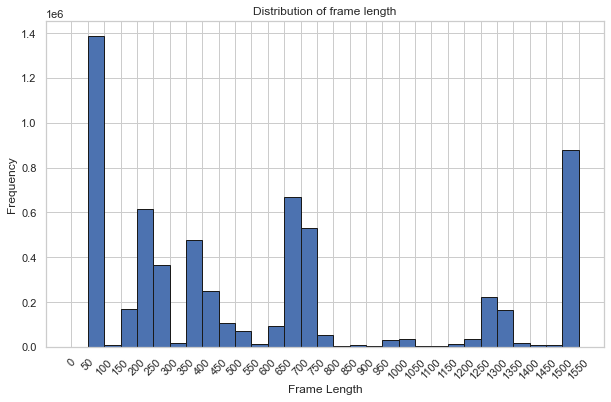

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with "frame.len" column

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the bin size
bin_size = 50

# Create bins for the "frame.len" column
bins = range(0, df['frame.len'].max() + bin_size, bin_size)

# Plot the histogram with bins
plt.figure(figsize=(10, 6))
plt.hist(df['frame.len'], bins=bins, edgecolor='k')
plt.title('Distribution of frame length')
plt.xlabel('Frame Length')
plt.ylabel('Frequency')
plt.xticks(bins, rotation=45)
plt.grid(True)
plt.show()


<Figure size 864x576 with 0 Axes>

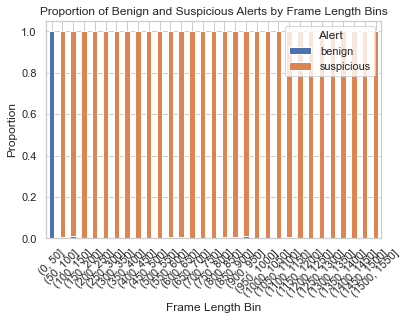

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with "frame.len" (binned) and "alert" columns

# Create bins for the "frame.len" column
bin_size = 50
bins = range(0, df['frame.len'].max() + bin_size, bin_size)
df['frame.len_bins'] = pd.cut(df['frame.len'], bins=bins)

# Calculate proportions of "alert" values within each bin
alerts_by_bin = df.groupby('frame.len_bins')['alert'].value_counts(normalize=True).unstack().fillna(0)

# Plot clustered bar plot
plt.figure(figsize=(12, 8))
alerts_by_bin.plot(kind='bar', stacked=True)
plt.title('Proportion of Benign and Suspicious Alerts by Frame Length Bins')
plt.xlabel('Frame Length Bin')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Alert')
plt.show()


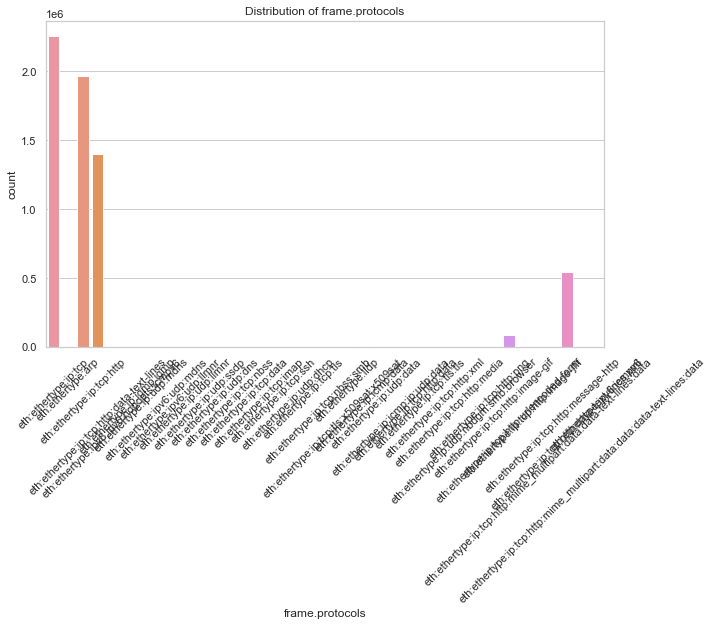

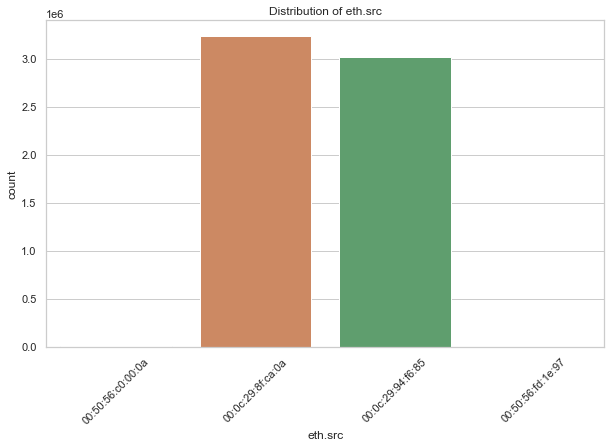

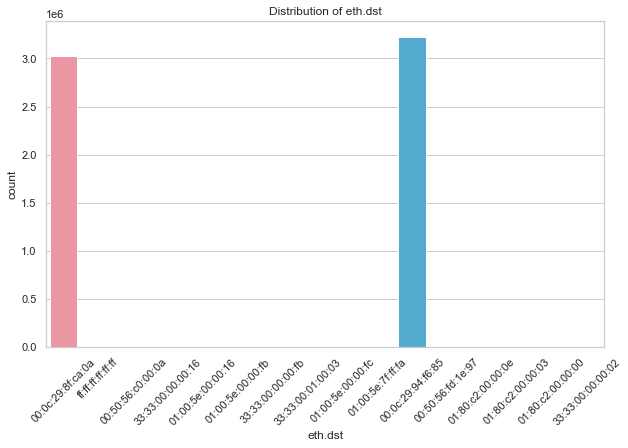

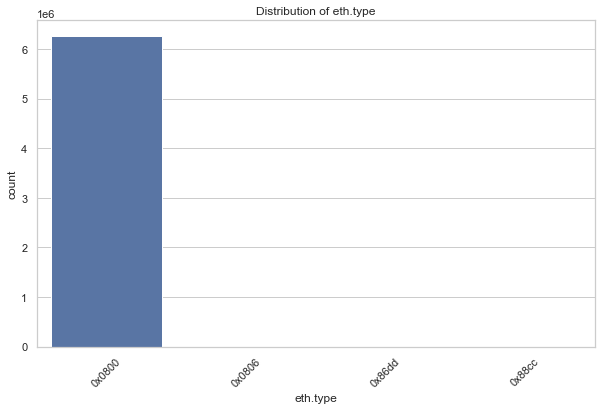

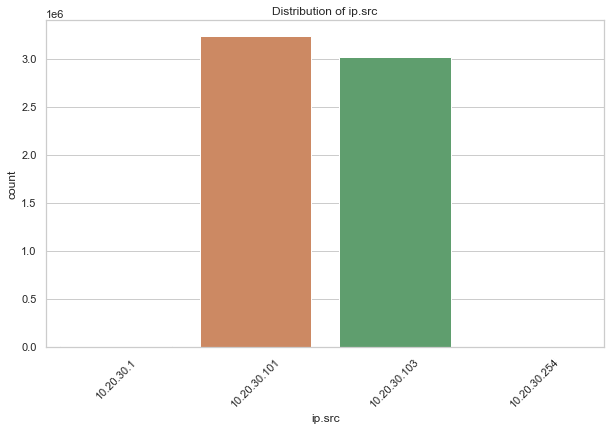

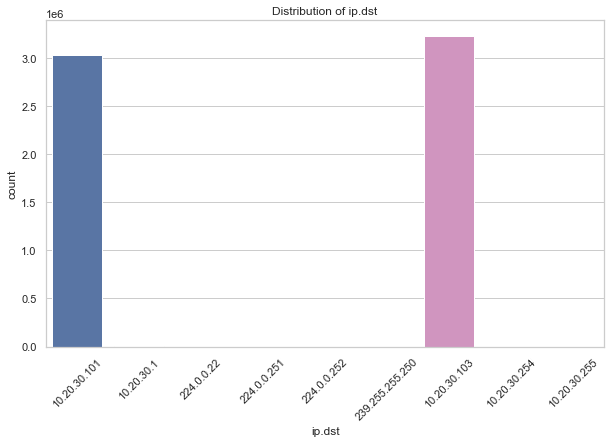

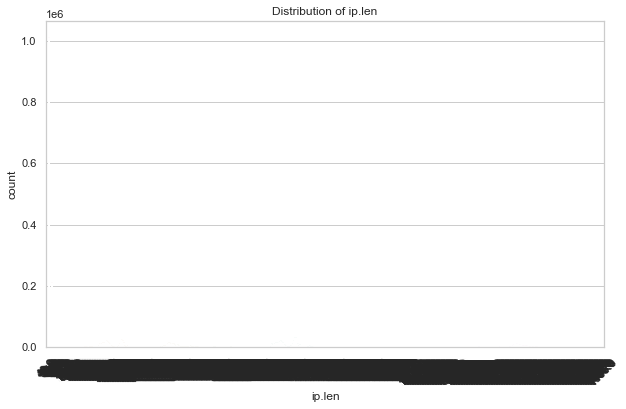

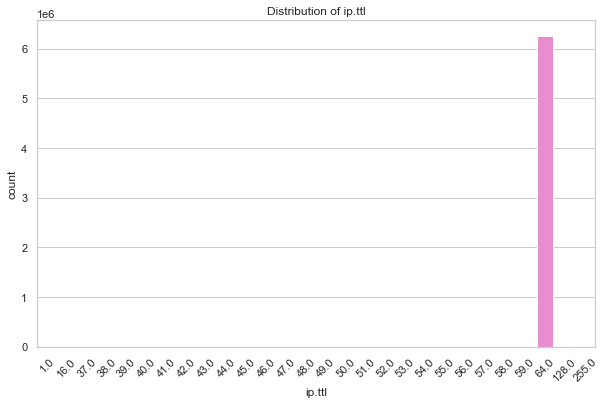

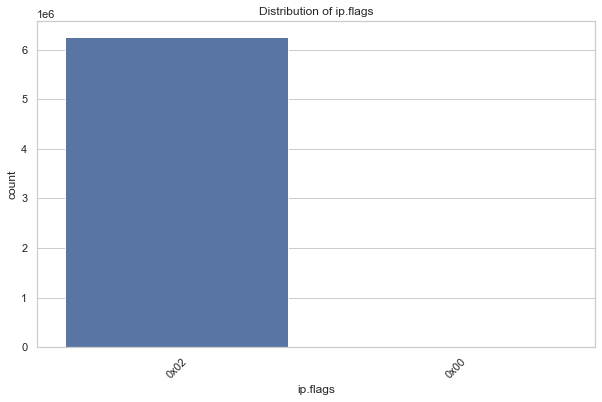

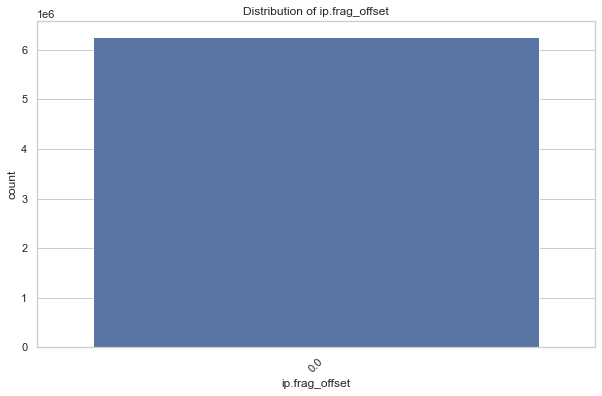

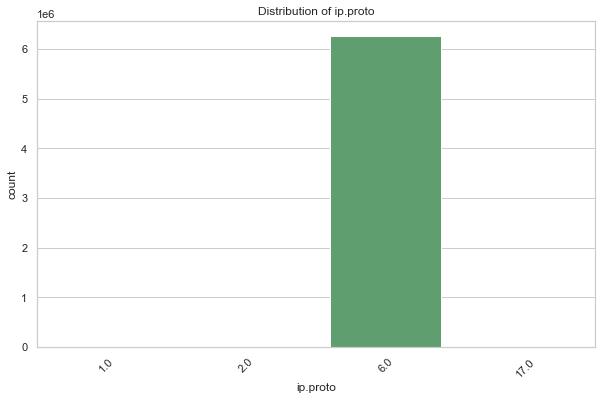

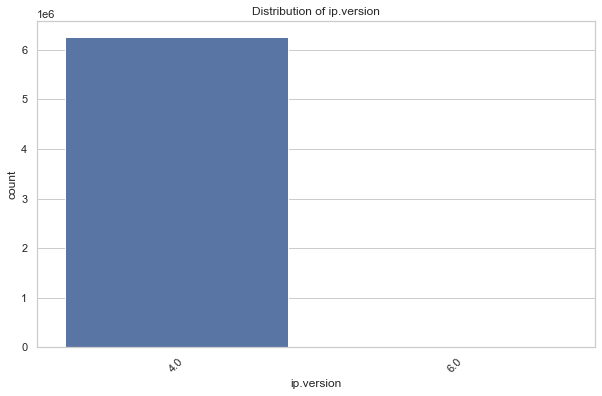

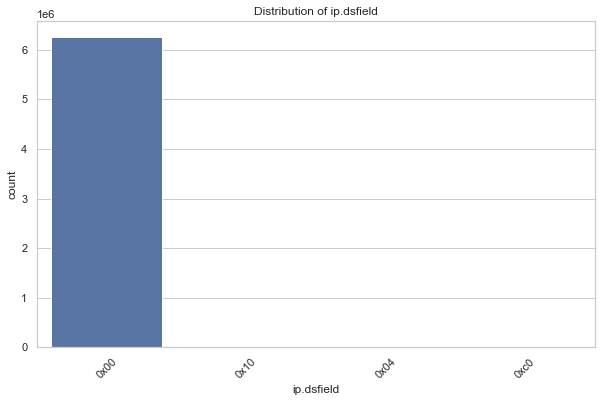

In [19]:


# Assuming df is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Loop through columns starting from the second column (index 1) to the end
for column in df.columns[1:]:
    # Plot count plot for the current column
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


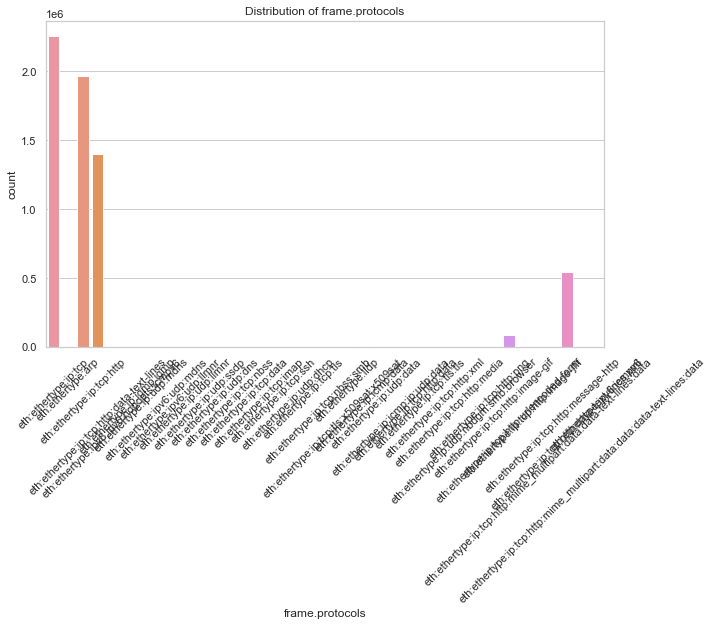

<Figure size 720x432 with 0 Axes>

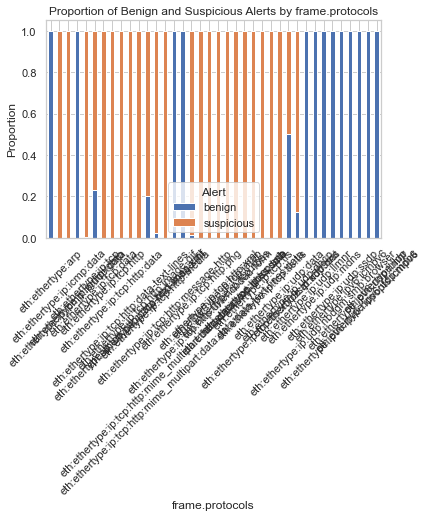

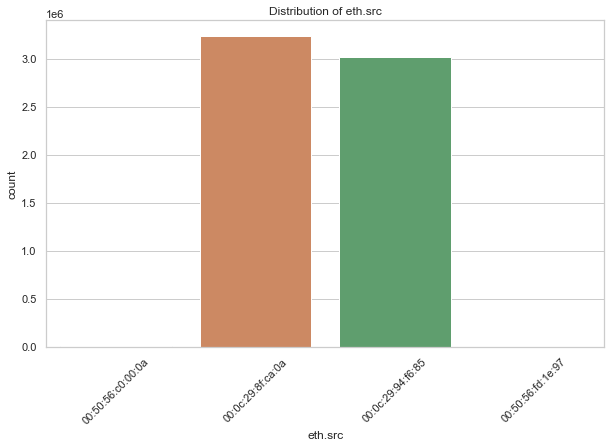

<Figure size 720x432 with 0 Axes>

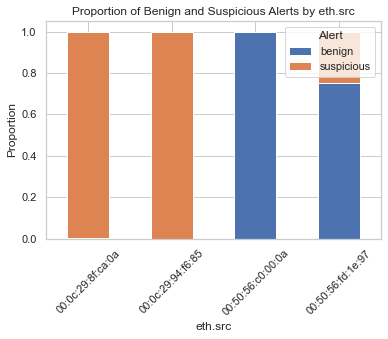

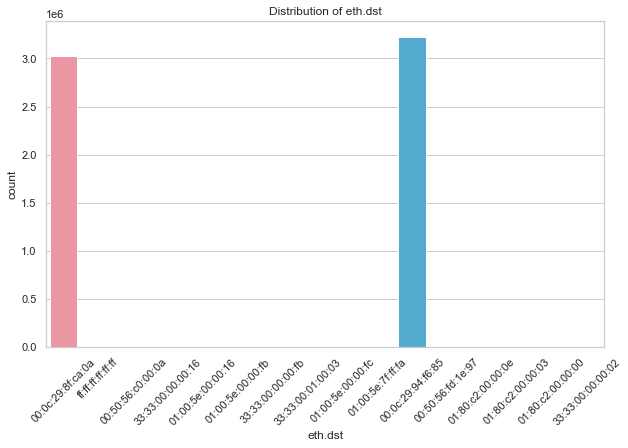

<Figure size 720x432 with 0 Axes>

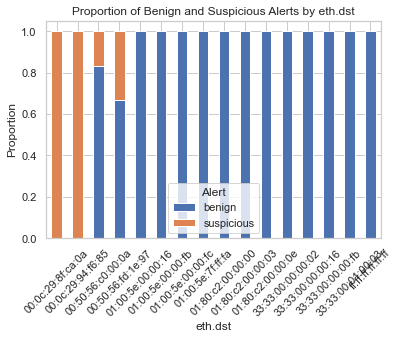

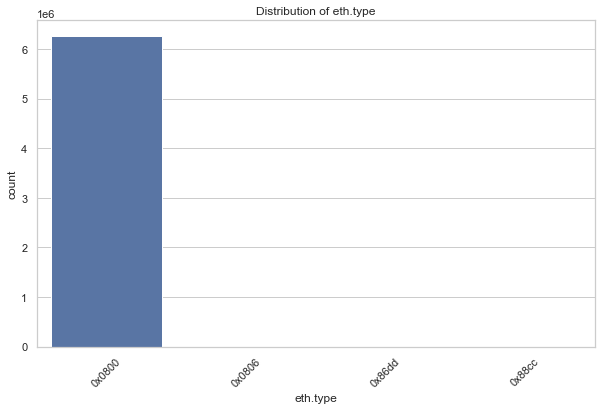

<Figure size 720x432 with 0 Axes>

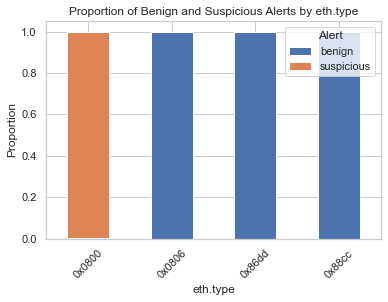

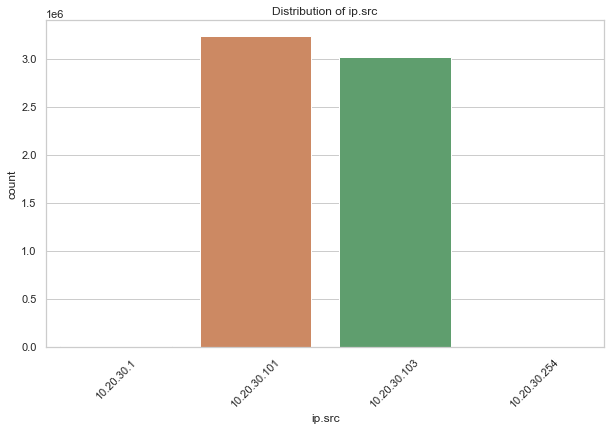

<Figure size 720x432 with 0 Axes>

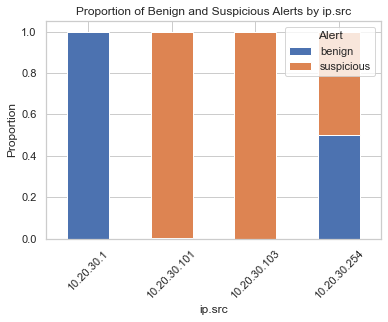

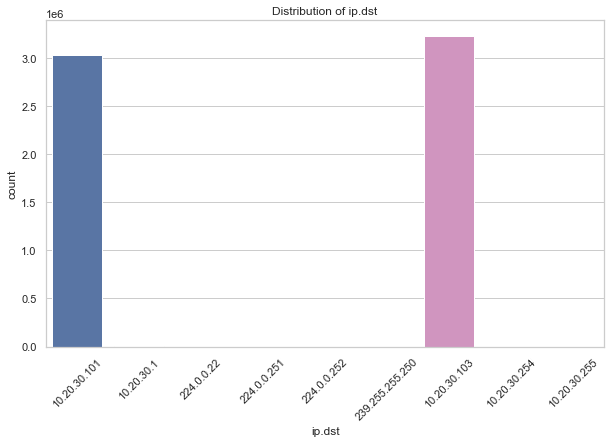

<Figure size 720x432 with 0 Axes>

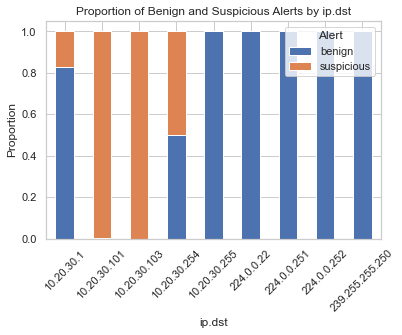

In [8]:


# Set the style of seaborn
sns.set(style="whitegrid")

# Columns 2 to 7
columns_to_plot = df.columns[1:7]

# Loop through columns 2 to 7
for column in columns_to_plot:
    # Plot count plot for the current column
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()
    
    # Calculate proportions of 'alert' values within each category of the current column
    alert_proportions = df.groupby(column)['alert'].value_counts(normalize=True).unstack().fillna(0)
    
    # Plot proportions of 'benign' and 'suspicious' alerts for the current column
    plt.figure(figsize=(10, 6))
    alert_proportions.plot(kind='bar', stacked=True)
    plt.title(f'Proportion of Benign and Suspicious Alerts by {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Alert')
    plt.show()
